# ML Mini Project #2

스마트폰 수집 신호를 이용한 인간 행위 인식

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


* 범주형 특성은 ML 알고리즘에 바로 적용하기 어려움 -> 숫자형으로 바꿔주기!

## 범주형 특성 처리

In [4]:
from sklearn.preprocessing import LabelEncoder

df_cat = df['Activity']
encoder = LabelEncoder()
encoder.fit(df_cat)
df_encoded = encoder.transform(df_cat)

In [5]:
df['Activity'] = df_encoded
df['Activity']

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int32

In [6]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,5
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,5
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,5
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,5


-> Activity에 해당하는 데이터들이 숫자로 바뀐 것을 확인할 수 있음.

## 상관관계 분석

In [7]:
corr_matrix = df.corr()
data = corr_matrix["Activity"].sort_values(ascending=False)
data

Activity                     1.000000
fBodyAccJerk-entropy()-X     0.845190
tBodyGyroJerk-entropy()-Z    0.844754
tBodyAccJerk-entropy()-Y     0.837034
tBodyAcc-sma()               0.835621
                               ...   
tGravityAcc-min()-Y         -0.749414
tBodyGyro-min()-Z           -0.776684
tBodyAccJerk-min()-X        -0.778826
tBodyAcc-min()-Y            -0.781408
tBodyAcc-min()-X            -0.802259
Name: Activity, Length: 563, dtype: float64

In [8]:
pd.set_option('display.max_rows', 800)

In [9]:
type(data)

pandas.core.series.Series

In [10]:
features = pd.DataFrame(data)

In [11]:
features['Activity']

Activity                                1.000000
fBodyAccJerk-entropy()-X                0.845190
tBodyGyroJerk-entropy()-Z               0.844754
tBodyAccJerk-entropy()-Y                0.837034
tBodyAcc-sma()                          0.835621
tBodyAccJerkMag-entropy()               0.835376
tGravityAccMag-sma()                    0.833126
tGravityAccMag-mean()                   0.833126
tBodyAccMag-sma()                       0.833126
tBodyAccMag-mean()                      0.833126
fBodyAccJerk-entropy()-Y                0.832284
fBodyAccMag-entropy()                   0.831222
fBodyAcc-entropy()-Y                    0.831114
fBodyAcc-std()-Y                        0.830052
fBodyBodyAccJerkMag-entropy()           0.829260
tBodyGyroMag-sma()                      0.827638
tBodyGyroMag-mean()                     0.827638
tBodyGyro-sma()                         0.827452
tBodyAccJerk-entropy()-X                0.826842
tBodyAcc-mad()-Y                        0.825999
fBodyAcc-entropy()-X

In [12]:
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE49FAC400>,
      dtype=object)

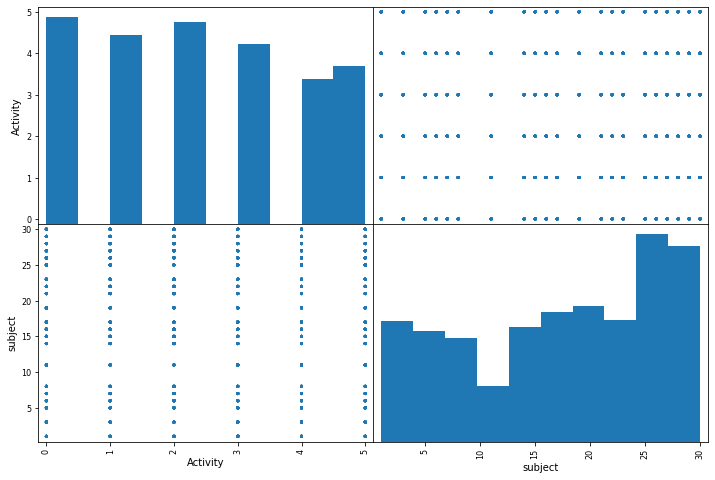

In [13]:
attributes = ["Activity", "subject"]
scatter_matrix(df[attributes], figsize=(12, 8))

-> Activity와 subject 사이에 큰 상관관계를 찾을 수 없으므로 subject 제거

## 데이터 분리 및 가공

In [14]:
X = df.drop(['subject', 'Activity'], axis=1)
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


* 데이터셋에서 subject와 Activity 열 삭제하기

In [15]:
y = df['Activity']
y

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int32

* 데이터셋에서 Activity 분리

## 로지스틱 회귀

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear",random_state=42)

In [17]:
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(log_reg, X, y, cv=10)
conf_mx = confusion_matrix(y, y_pred)

In [19]:
conf_mx

array([[1405,    0,    0,    0,    2,    0],
       [   8, 1205,   73,    0,    0,    0],
       [   0,   84, 1290,    0,    0,    0],
       [   0,    0,    0, 1155,   11,   60],
       [   0,    0,    0,    9,  935,   42],
       [   0,   16,    0,   41,   35,  981]], dtype=int64)

In [20]:
from sklearn.model_selection import cross_val_score

log_reg_score = cross_val_score(log_reg, X, y, cv=10, scoring="accuracy")
log_reg_score.mean()

0.9481819358178052

# SVC

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X, y)

SVC(kernel='linear', random_state=42)

In [22]:
svm_score = cross_val_score(svm_clf, X, y, cv=10, scoring="accuracy")
svm_score.mean()

0.9522652321798285

In [23]:
y_pred = cross_val_predict(svm_clf, X, y, cv=10)
conf_mx = confusion_matrix(y, y_pred)

In [24]:
conf_mx

array([[1407,    0,    0,    0,    0,    0],
       [   3, 1215,   67,    0,    0,    1],
       [   0,   74, 1300,    0,    0,    0],
       [   0,    0,    0, 1156,   10,   60],
       [   0,    0,    0,   18,  934,   34],
       [   0,    0,    0,   32,   52,  989]], dtype=int64)

# SVC 조정

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", random_state=42)
sgd_clf.fit(X, y)

SGDClassifier(random_state=42)

In [27]:
sgd_score = cross_val_score(sgd_clf, X, y, cv=10, scoring="accuracy")
sgd_score.mean()

0.9367520703933747

In [28]:
y_pred = cross_val_predict(svm_clf, X, y, cv=10)
conf_mx = confusion_matrix(y, y_pred)
conf_mx

array([[1407,    0,    0,    0,    0,    0],
       [   3, 1215,   67,    0,    0,    1],
       [   0,   74, 1300,    0,    0,    0],
       [   0,    0,    0, 1156,   10,   60],
       [   0,    0,    0,   18,  934,   34],
       [   0,    0,    0,   32,   52,  989]], dtype=int64)

In [30]:
best_score = 0

In [ ]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(kerne="linear", gamma=gamma, C=C)
        
        scores = cross_val_score(svm, X, y, cv=10)
        
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameter = {'gamma': gamma, 'C': C}

svm = SVC(best_parameter)


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = [{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [35]:
svm_clf = SVC(kernel="linear", random_state=42)
grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring="accuracy", 
                           return_train_score=True)

In [36]:
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear', random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}],
             return_train_score=True, scoring='accuracy')

In [37]:
grid_search.best_params_

{'C': 1, 'gamma': 0.001}

In [38]:
grid_search.best_estimator_

SVC(C=1, gamma=0.001, kernel='linear', random_state=42)

In [63]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8928198018337768 {'C': 0.001, 'gamma': 0.001}
0.8928198018337768 {'C': 0.001, 'gamma': 0.01}
0.8928198018337768 {'C': 0.001, 'gamma': 0.1}
0.8928198018337768 {'C': 0.001, 'gamma': 1}
0.8928198018337768 {'C': 0.001, 'gamma': 10}
0.8928198018337768 {'C': 0.001, 'gamma': 100}
0.9356660381543923 {'C': 0.01, 'gamma': 0.001}
0.9356660381543923 {'C': 0.01, 'gamma': 0.01}
0.9356660381543923 {'C': 0.01, 'gamma': 0.1}
0.9356660381543923 {'C': 0.01, 'gamma': 1}
0.9356660381543923 {'C': 0.01, 'gamma': 10}
0.9356660381543923 {'C': 0.01, 'gamma': 100}
0.9476395666962437 {'C': 0.1, 'gamma': 0.001}
0.9476395666962437 {'C': 0.1, 'gamma': 0.01}
0.9476395666962437 {'C': 0.1, 'gamma': 0.1}
0.9476395666962437 {'C': 0.1, 'gamma': 1}
0.9476395666962437 {'C': 0.1, 'gamma': 10}
0.9476395666962437 {'C': 0.1, 'gamma': 100}
0.9522652321798285 {'C': 1, 'gamma': 0.001}
0.9522652321798285 {'C': 1, 'gamma': 0.01}
0.9522652321798285 {'C': 1, 'gamma': 0.1}
0.9522652321798285 {'C': 1, 'gamma': 1}
0.9522652321798285 {'

-> C = 1, gamma = 100이 최적!